<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W3_D4_MiniProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Importer du fichier

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/My Drive/Datasets/Apple_Stock_Prices.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [25]:
# Valeur null et type de données

# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV avec conversion automatique de la colonne 'Date' et mise en index
df = pd.read_csv('/content/drive/My Drive/Datasets/Apple_Stock_Prices.csv', parse_dates=['Date'], index_col='Date')


In [26]:
# Afficher les 5 premières lignes pour avoir un aperçu
print("Aperçu des données :")
print(df.head())

# Vérifier les types de données
print("\nTypes de données :")
print(df.dtypes)

# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Afficher des statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

Aperçu des données :
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200

Types de données :
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Valeurs manquantes :
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Statistiques descriptives :
               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mea

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


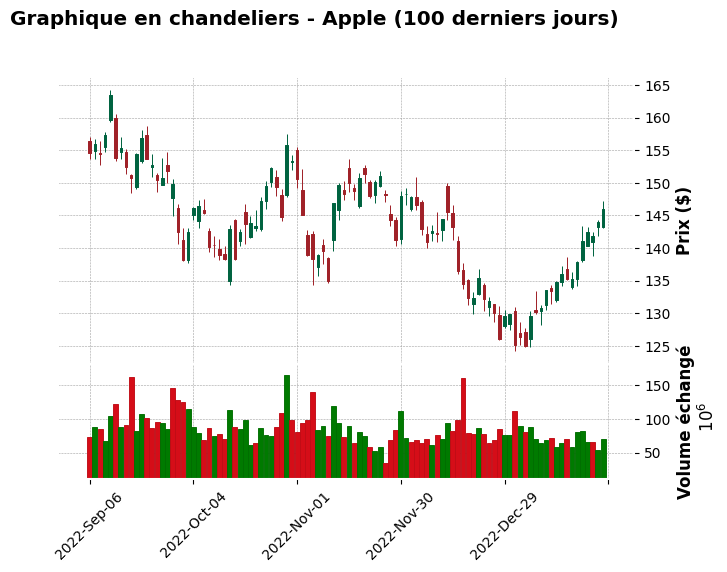

In [31]:
import pandas as pd
import mplfinance as mpf

# 1. Recharger correctement le fichier
file_path = '/content/drive/My Drive/Datasets/Apple_Stock_Prices.csv'
df = pd.read_csv(file_path, dayfirst=True)  # Important : dayfirst=True ici
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # reconversion explicite
df.set_index('Date', inplace=True)  # mise en index correcte

# 2. Créer un DataFrame propre pour le candlestick
df_candle = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
df_candle.dropna(inplace=True)

# 3. Vérification rapide
print(type(df_candle.index))  # doit afficher: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# 4. Afficher le graphique en chandeliers
mpf.plot(df_candle[-100:], type='candle', volume=True, style='charles',
         title="Graphique en chandeliers - Apple (100 derniers jours)",
         ylabel='Prix ($)', ylabel_lower='Volume échangé')



In [38]:
# Statistical Analysis

# Colonnes clés à analyser
key_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Calcul de la moyenne, médiane et écart-type
for col in key_columns:
    print(f"Statistiques pour '{col}':\n")

    print(f"→ Moyenne : {df[col].mean():.2f}")

    print(f"→ Médiane : {df[col].median():.2f}")

    print(f"→ Écart-type : {df[col].std():.2f}\n")



Statistiques pour 'Open':

→ Moyenne : 16.69
→ Médiane : 0.49
→ Écart-type : 35.45

Statistiques pour 'High':

→ Moyenne : 16.88
→ Médiane : 0.50
→ Écart-type : 35.88

Statistiques pour 'Low':

→ Moyenne : 16.50
→ Médiane : 0.48
→ Écart-type : 35.03

Statistiques pour 'Close':

→ Moyenne : 16.70
→ Médiane : 0.49
→ Écart-type : 35.47

Statistiques pour 'Volume':

→ Moyenne : 327509817.26
→ Médiane : 214597600.00
→ Écart-type : 337820279.06



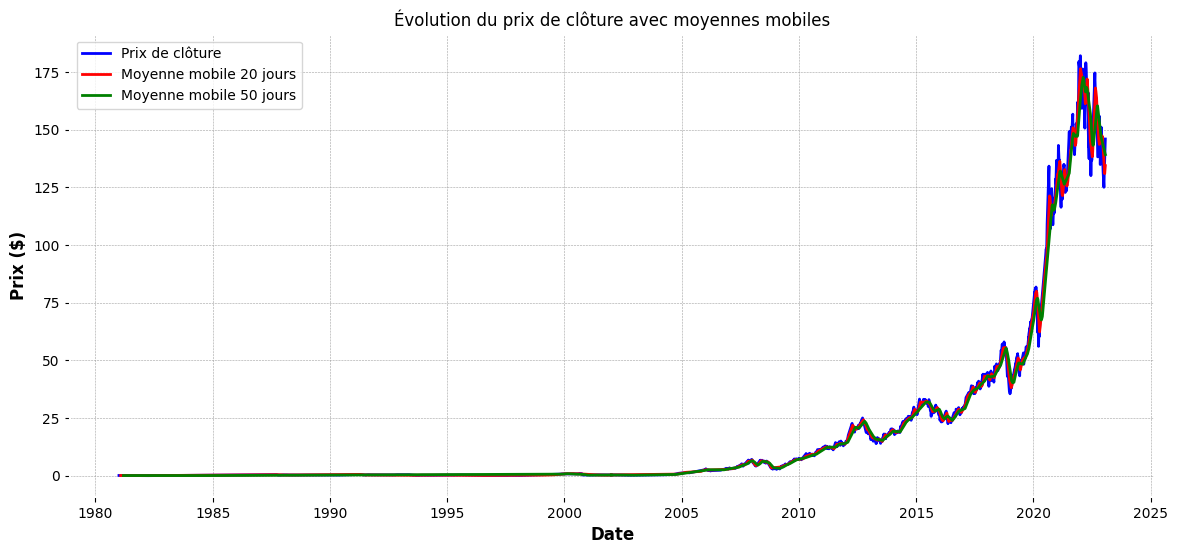

In [43]:
# Ajouter une moyenne mobile sur 20 jours
df['MA20'] = df['Close'].rolling(window=20).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Prix de clôture', color='blue')
plt.plot(df['MA20'], label='Moyenne mobile 20 jours', color='red')
plt.plot(df['MA50'], label='Moyenne mobile 50 jours', color='green')
plt.title("Évolution du prix de clôture avec moyennes mobiles")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# T-Test :


from scipy.stats import ttest_ind

# Extraire l'année depuis l'index
df['Year'] = df.index.year

# Sélectionner les prix de clôture de 2010 et 2020
close_2010 = df[df['Year'] == 2010]['Close'].dropna()
close_2020 = df[df['Year'] == 2020]['Close'].dropna()

# Effectuer le t-test
t_stat, p_value = ttest_ind(close_2010, close_2020, equal_var=False)

print("🔬 T-test entre les années 2010 et 2020 :")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.4f}")


🔬 T-test entre les années 2010 et 2020 :
T-statistic = -62.6501
P-value = 0.0000


In [45]:
from scipy.stats import normaltest
import numpy as np

# Calcul des rendements journaliers
df['Daily Return'] = df['Close'].pct_change().dropna()

# Test de normalité (D’Agostino and Pearson)
stat, p = normaltest(df['Daily Return'].dropna())

print("\n📊 Test de normalité sur les rendements journaliers :")
print(f"Statistique de test = {stat:.4f}")
print(f"P-value = {p:.4f}")

if p < 0.05:
    print("❌ Les rendements NE suivent PAS une distribution normale (p < 0.05)")
else:
    print("✅ Les rendements SUIVENT une distribution normale (p ≥ 0.05)")



📊 Test de normalité sur les rendements journaliers :
Statistique de test = 2719.2053
P-value = 0.0000
❌ Les rendements NE suivent PAS une distribution normale (p < 0.05)


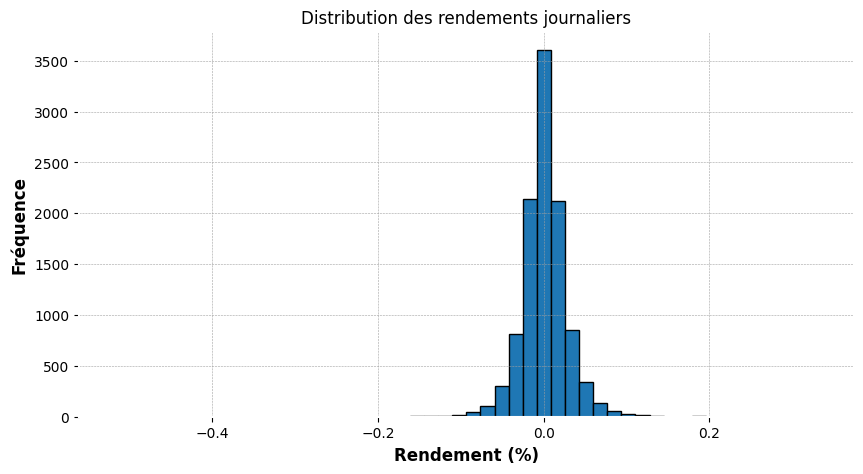

In [46]:
plt.figure(figsize=(10,5))
plt.hist(df['Daily Return'].dropna(), bins=50, edgecolor='black')
plt.title("Distribution des rendements journaliers")
plt.xlabel("Rendement (%)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()